## Depth around *Med14Y*

Imports.

In [1]:
import matplotlib.pyplot as plt # make simple visualizations
import pandas as pd # data management

import io_helpers # file I/O


This I/O helper file uses:
Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)],
Matplotlib version 3.7.1,
pandas version 1.5.3



Constants.

In [2]:
sample_info = io_helpers.load_sample_info_and_haplogroups(add_female_to_y=True)

founders_depth = io_helpers.read_csv(
    'data', 'depth', 'founders_near_Med14Y.csv', index_col=0)
deep_modern_depth = io_helpers.read_csv(
    'data', 'depth', 'modern_deep_near_Med14Y.csv', index_col=0)
shallow_modern_depth = io_helpers.read_csv(
    'data', 'depth', 'modern_shallow_in_Med14Y.csv', index_col=0)

# 1-based indexing, same as the depth files
med14y_loc = (115388, 143078)

Helper function.

In [3]:
def plot_coverage(depth: pd.Series, ax: plt.Axes, show_y_label: bool) -> None:
    """Plot coverage across a given region.
    
    Parameters
    ----------
    depth: pd.Series
        Read depth, labeled by 1-indexed position.
    ax: plt.Axes
        Axes to plot on.
    show_y_label: bool
        Whether to label the Y axis with "Read depth".
    """

    ax.scatter(depth.index, depth, s=1)
    
    # remove bottom axis in order to put a line for Med14Y
    ax.set_xticks([])
    ax.spines['bottom'].set_visible(False)
    ax.hlines(y=0, xmin=med14y_loc[0], xmax=med14y_loc[1], 
              color='red', linewidth=2)
    ax.text(0.55, -0.1, 'Med14Y', style='italic', transform=ax.transAxes)
    
    if show_y_label: ax.set_ylabel('Read depth', fontsize=14)

Check read depth around *Med14Y* in deeply-sequenced samples.

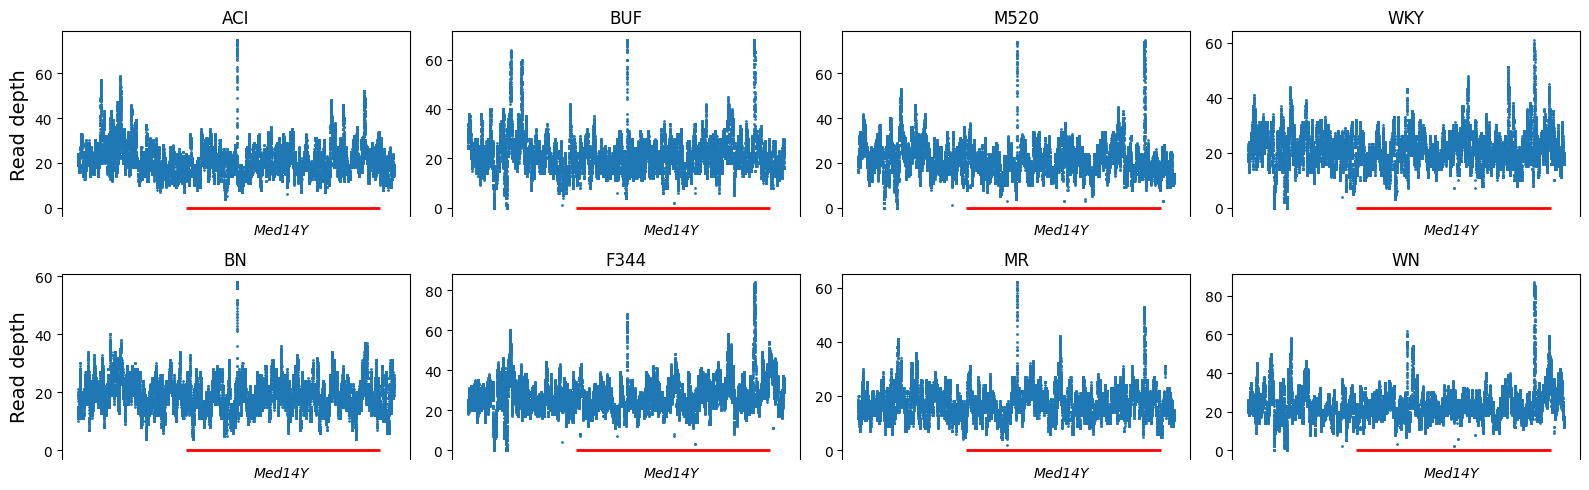

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=4)

for row in range(2):
    for col in range(4):
        cur_ax = axs[row, col]
        is_first_col = col==0
        name = founders_depth.columns[col * 2 + row]

        plot_coverage(founders_depth[name], cur_ax, show_y_label=is_first_col)
        cur_ax.set_title(name)

fig.set_size_inches(16, 5)
fig.tight_layout()

# Figure C
io_helpers.save_plot('founder_Med14Y_depth', extension='png', figure=fig)

These are all of the modern HS rats with deep sequencing.

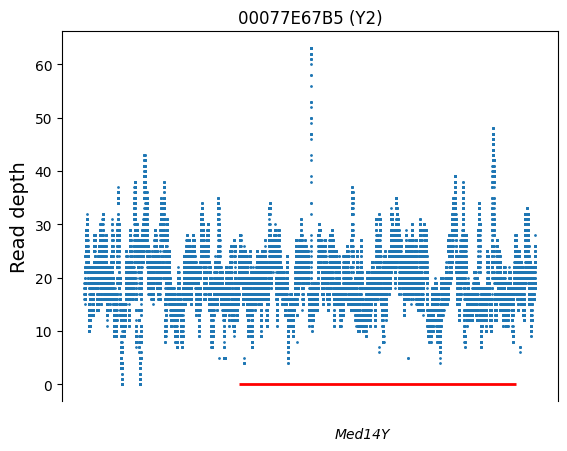

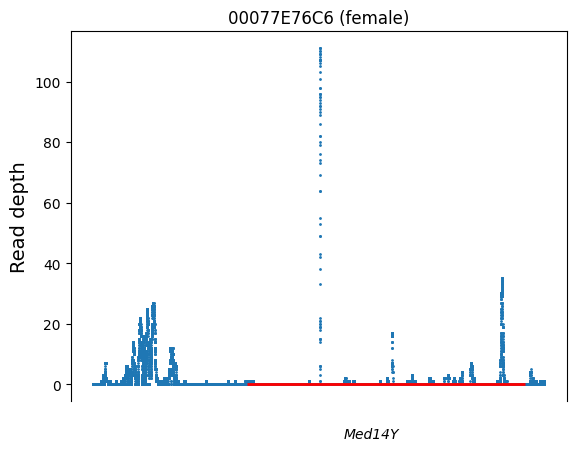

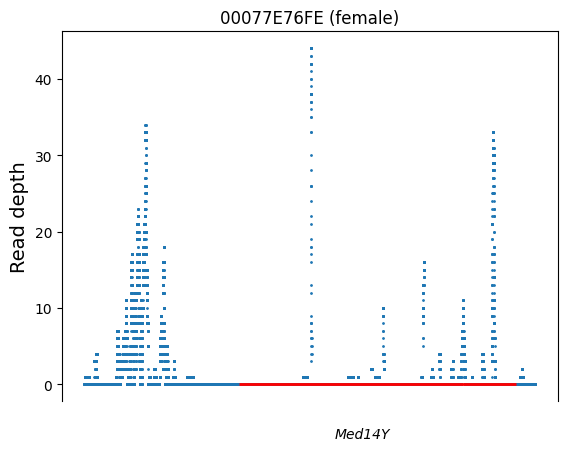

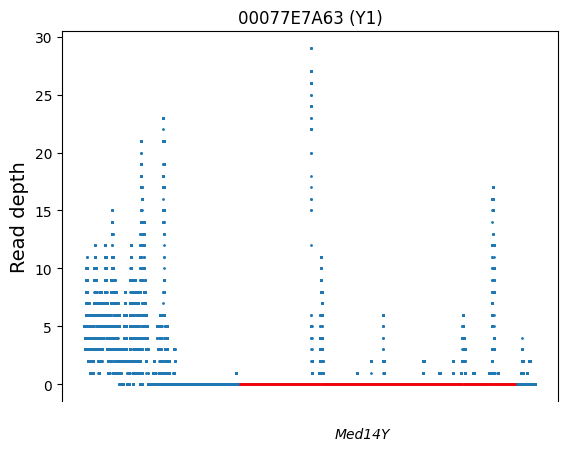

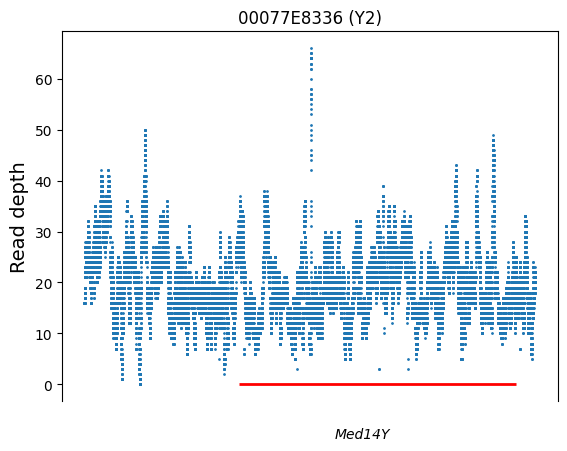

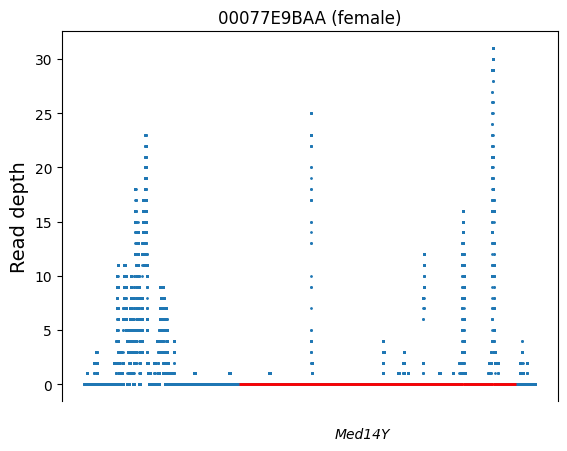

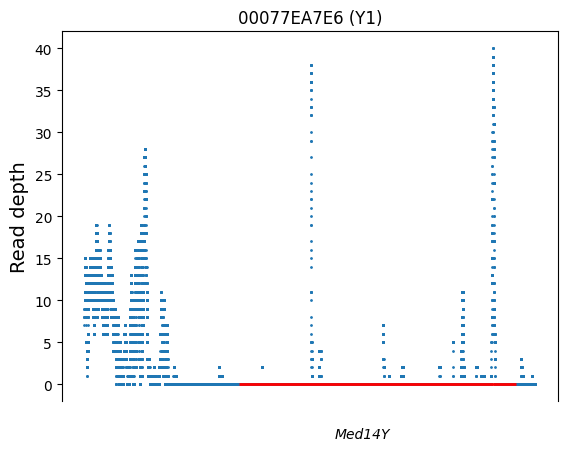

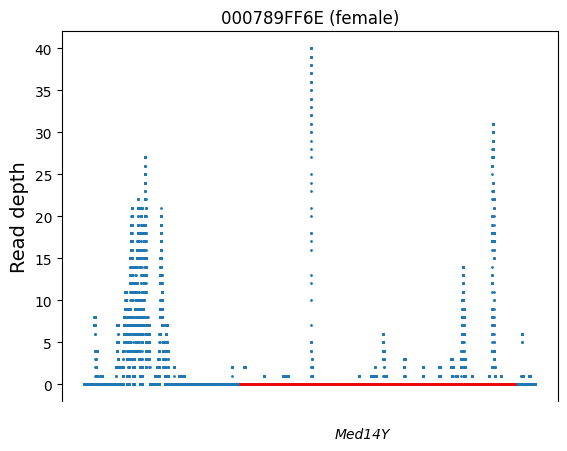

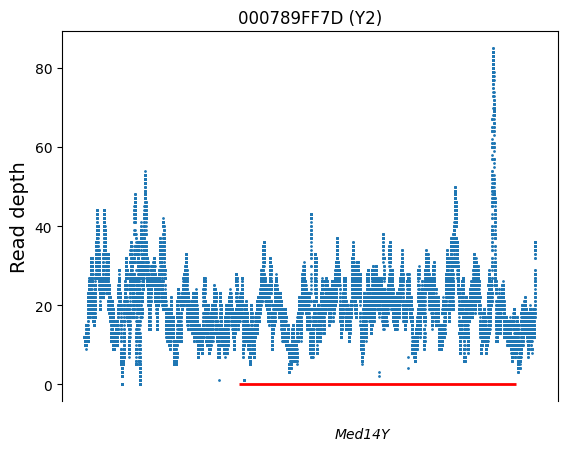

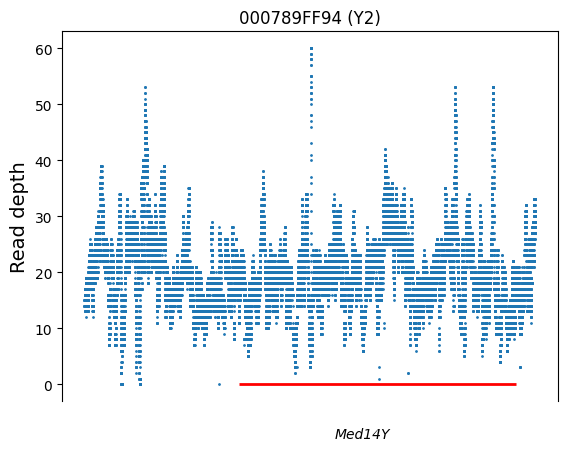

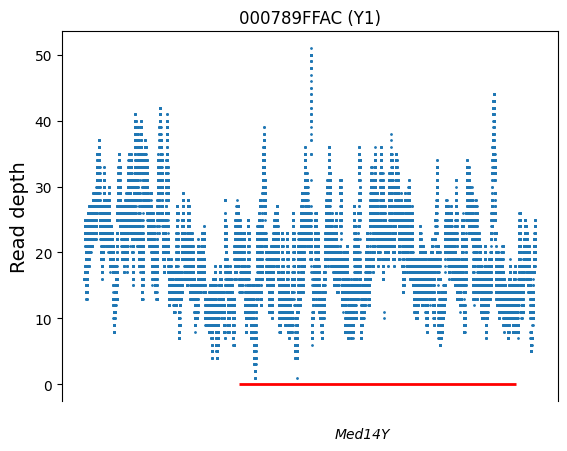

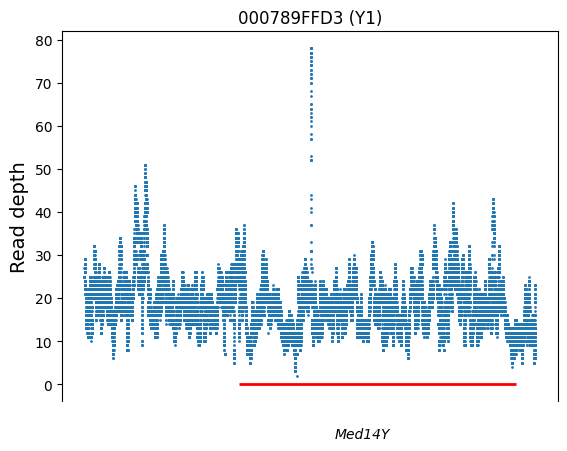

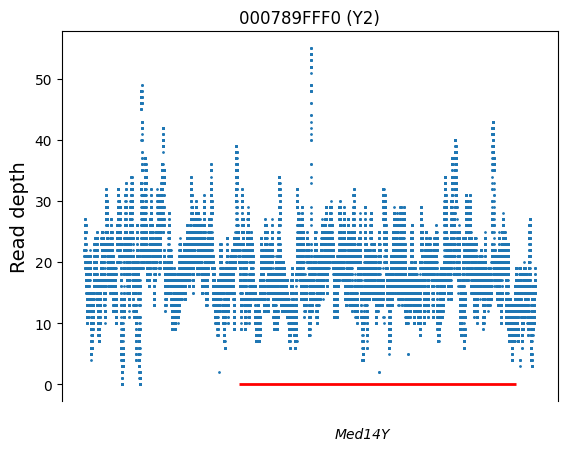

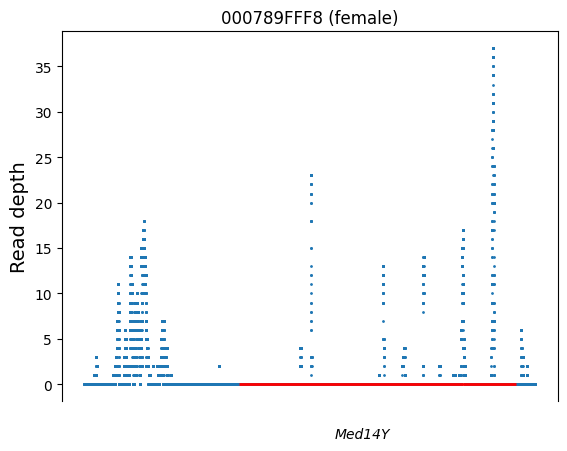

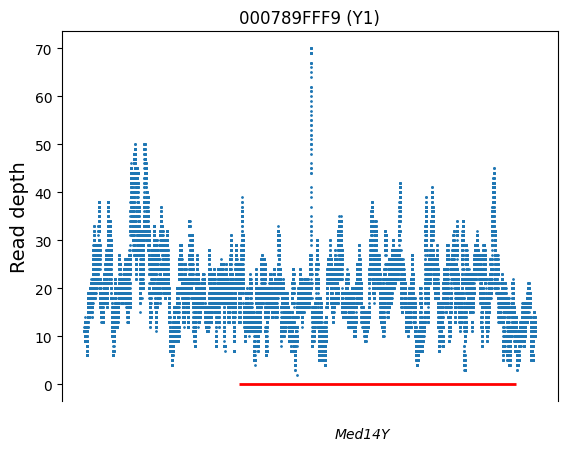

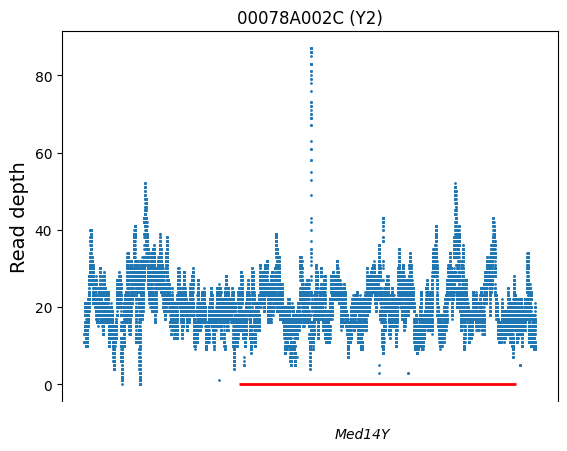

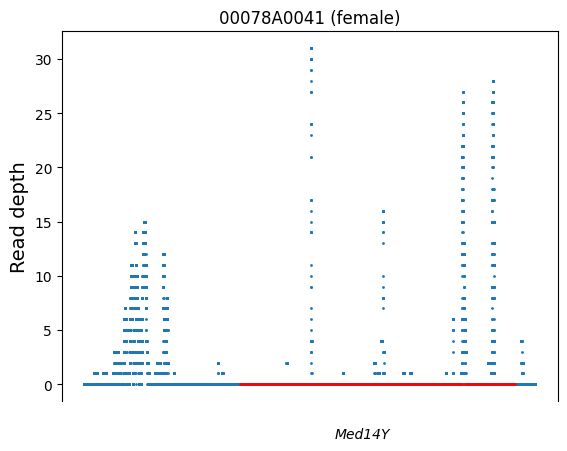

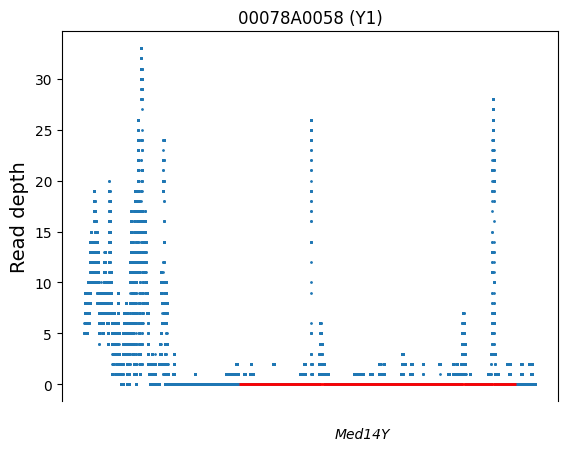

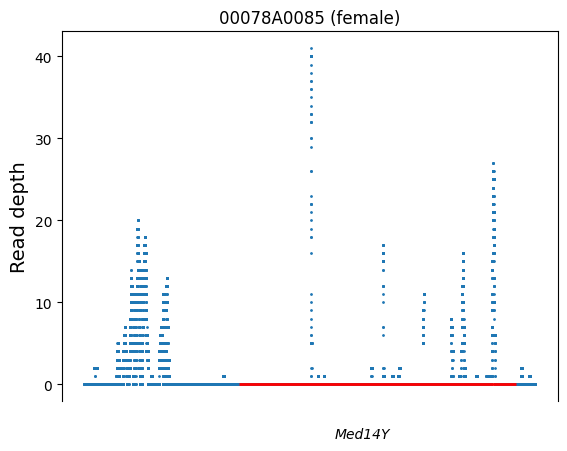

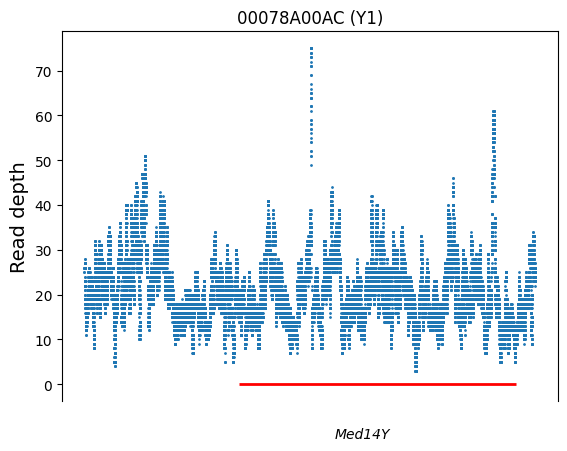

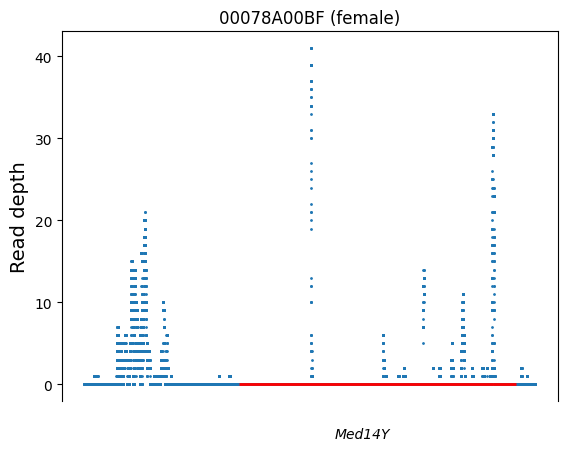

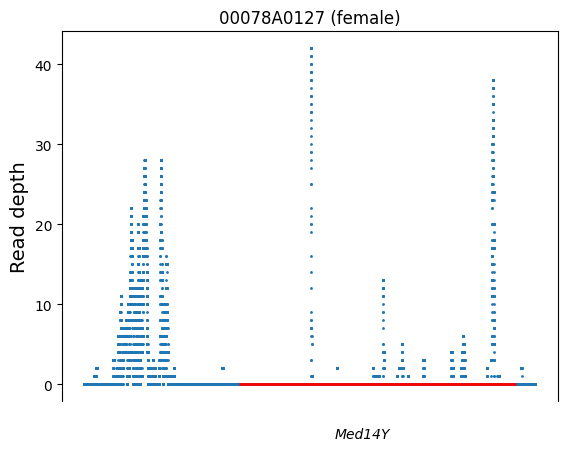

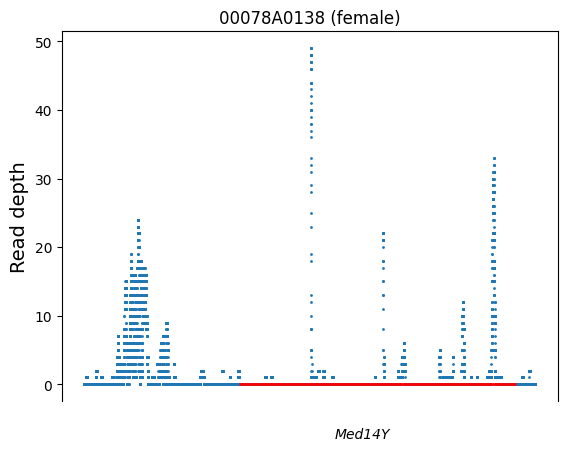

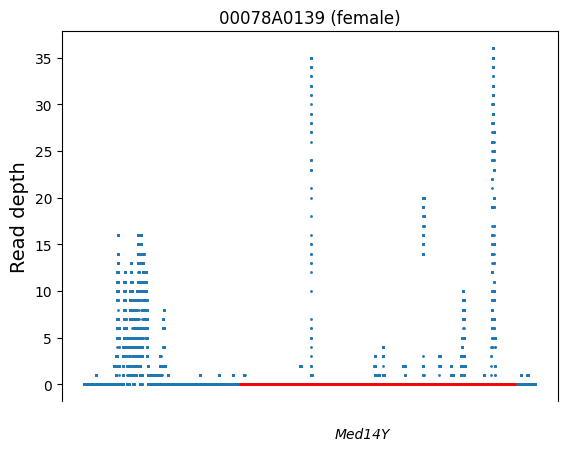

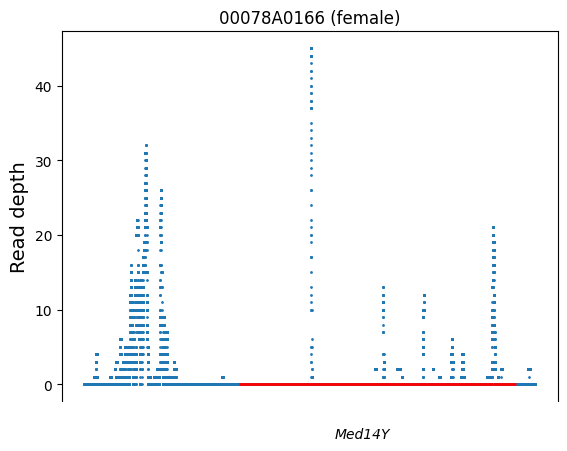

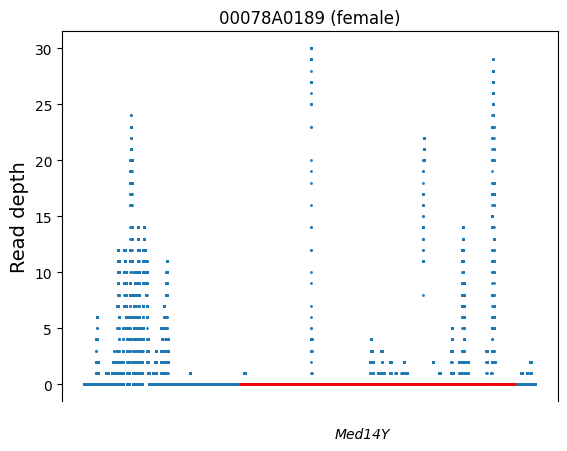

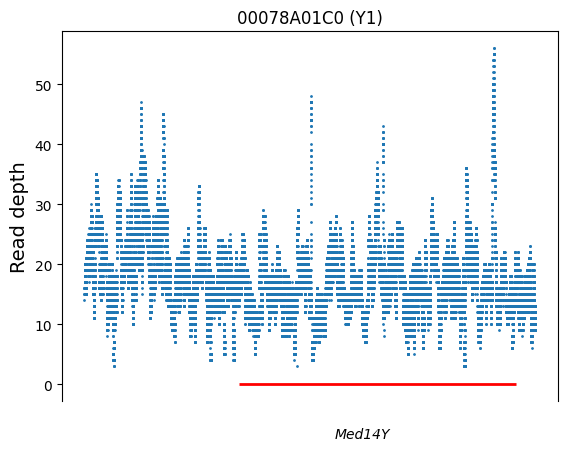

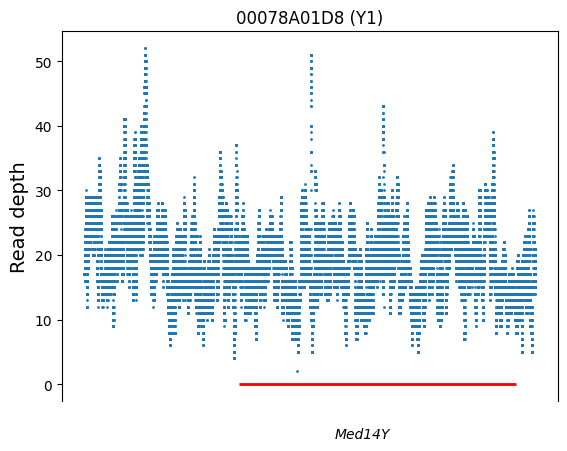

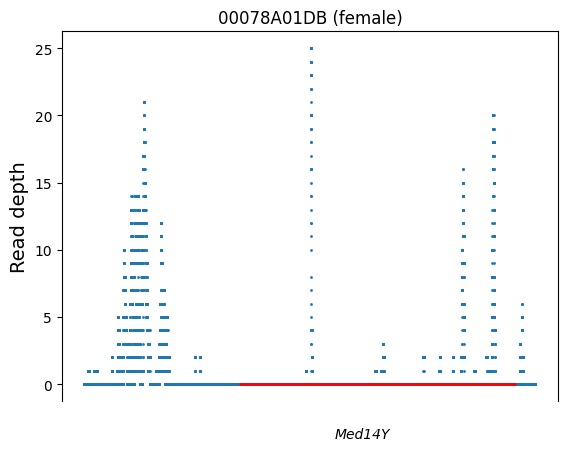

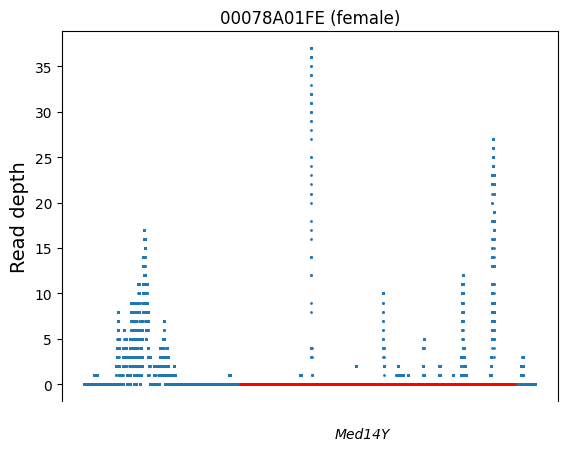

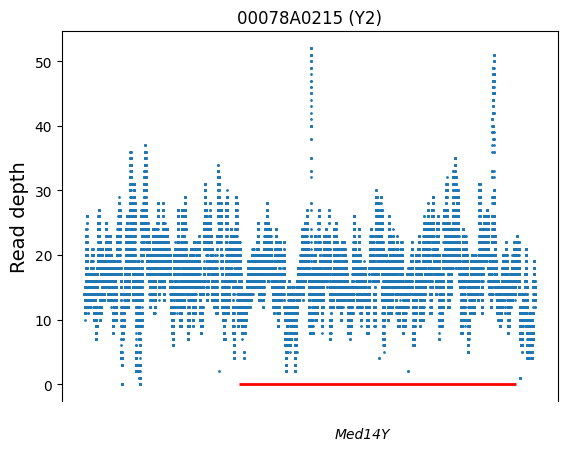

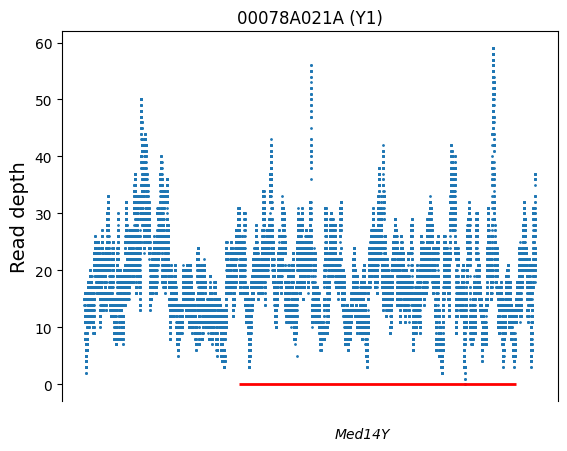

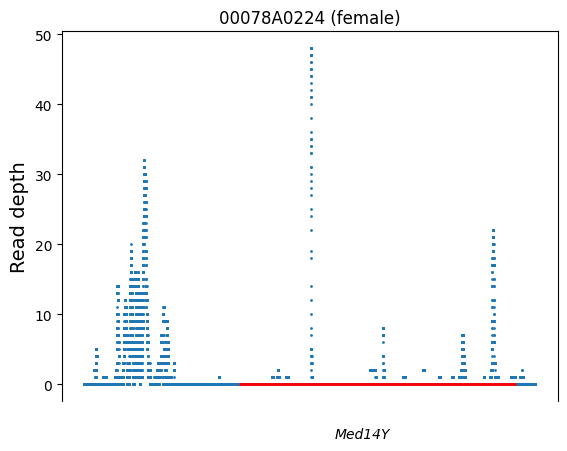

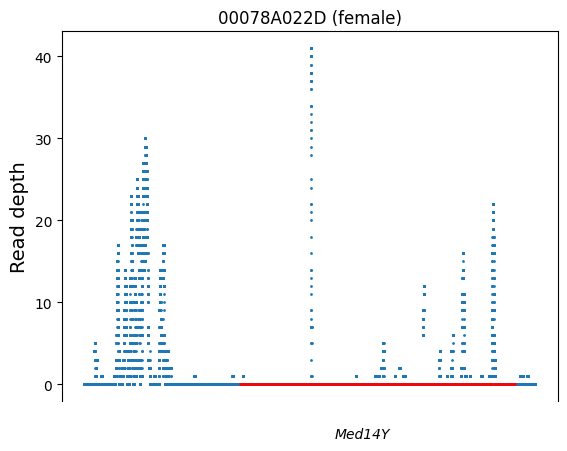

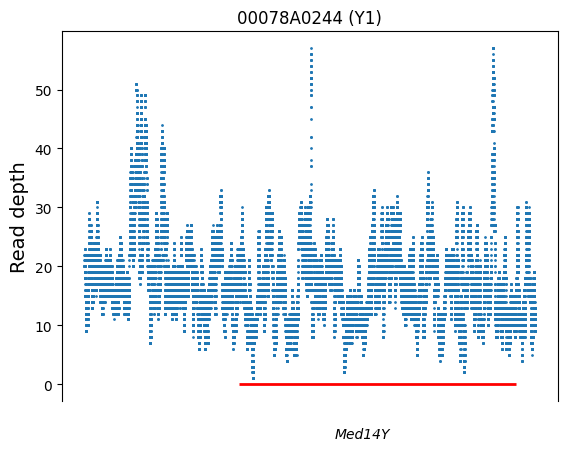

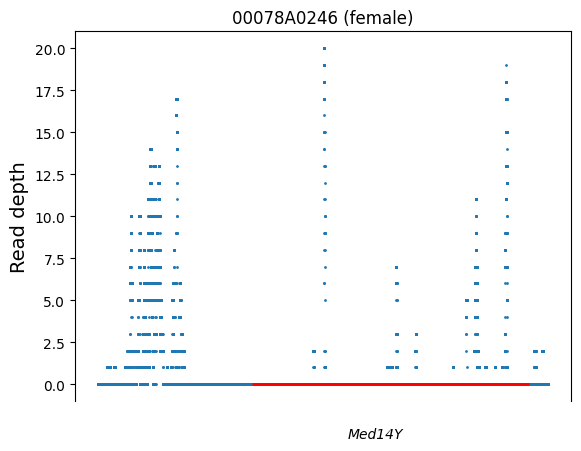

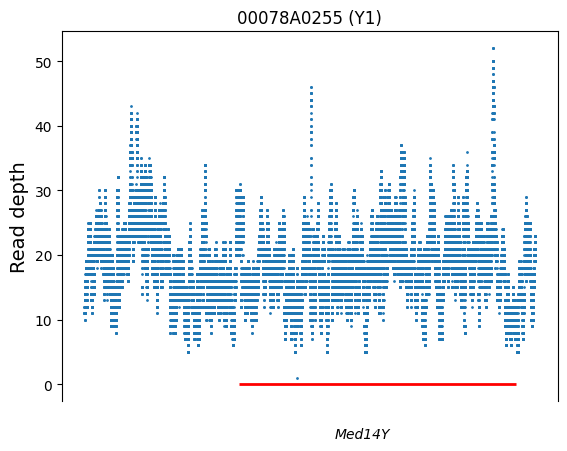

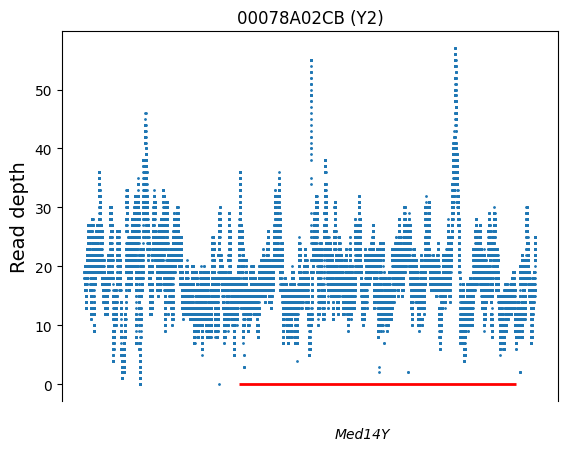

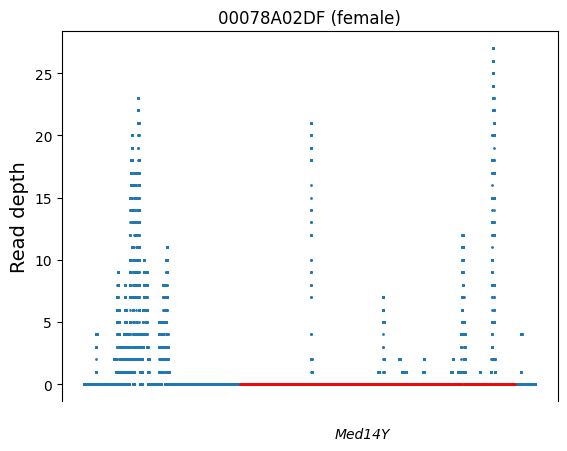

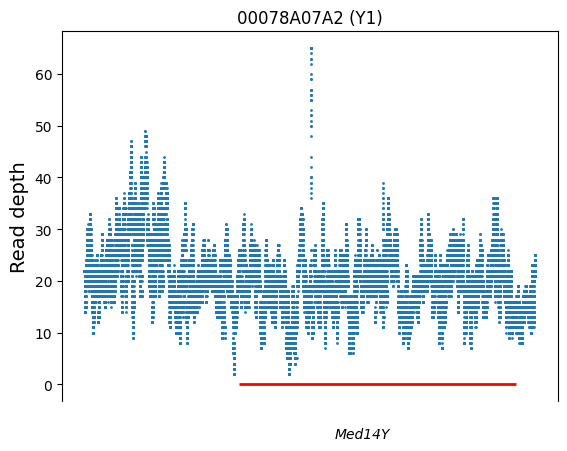

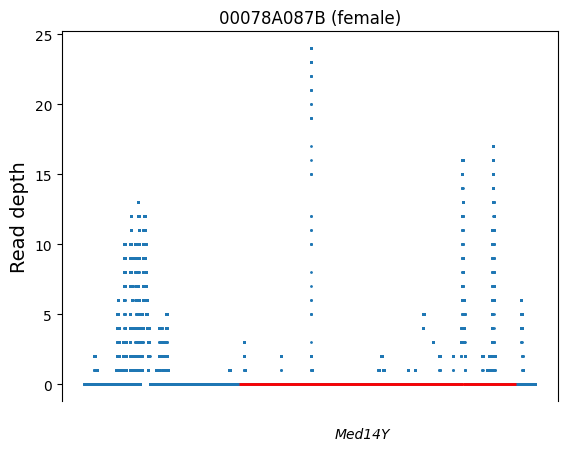

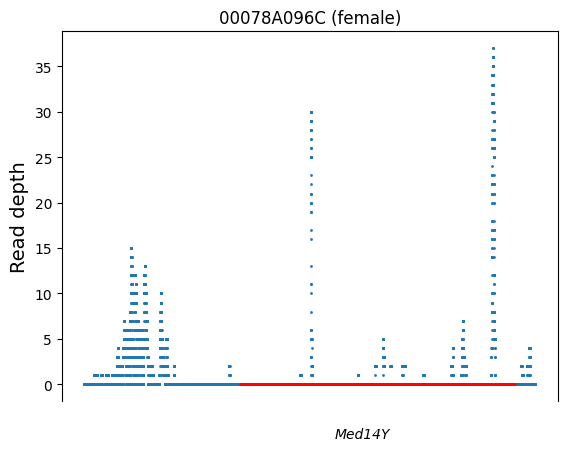

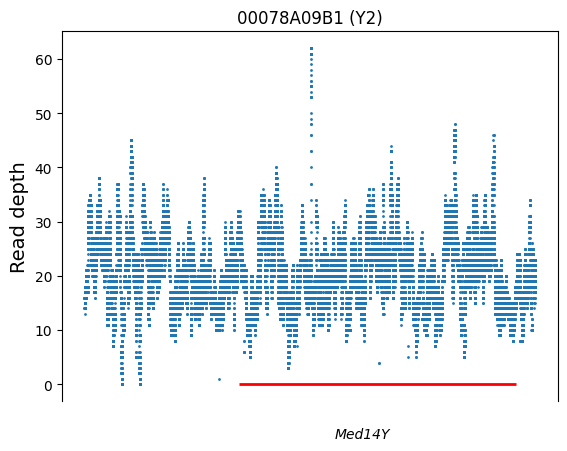

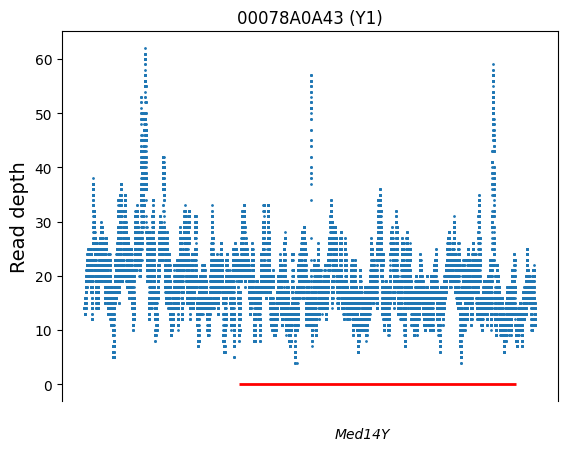

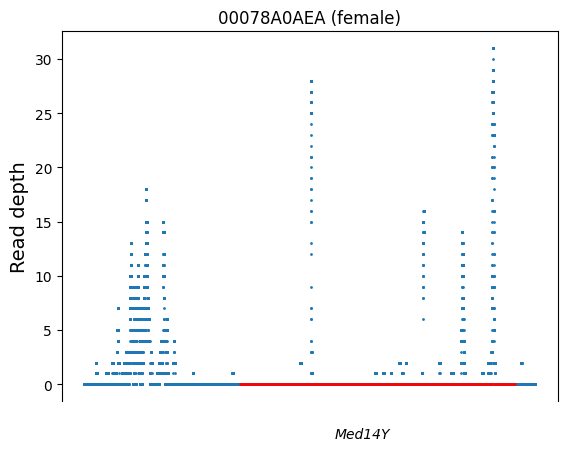

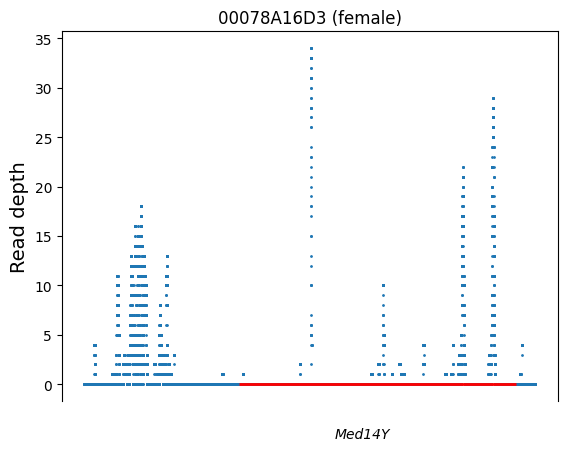

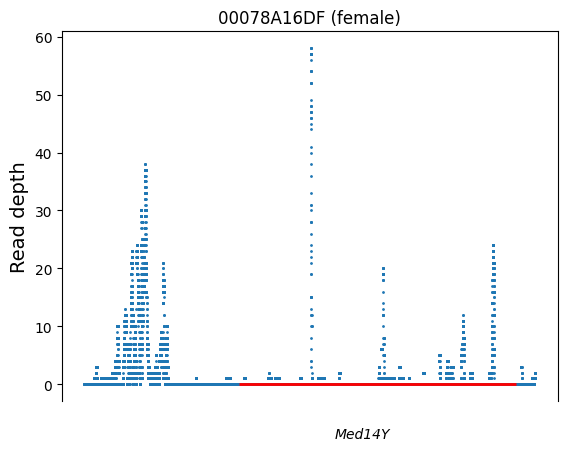

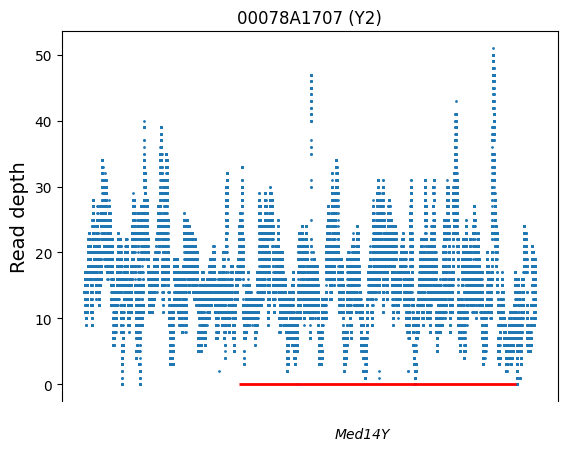

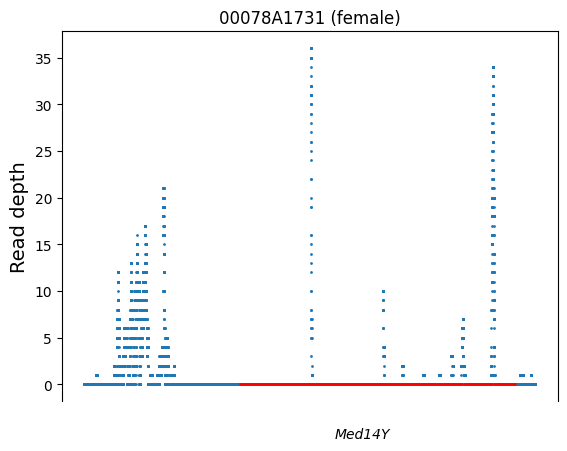

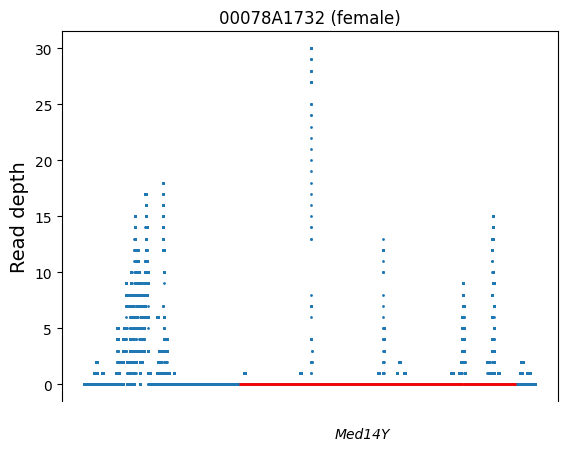

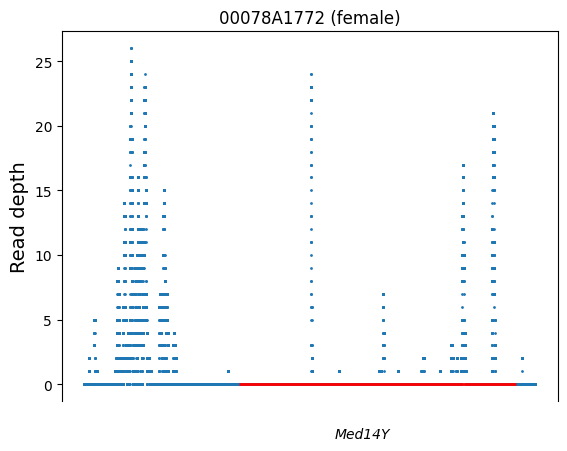

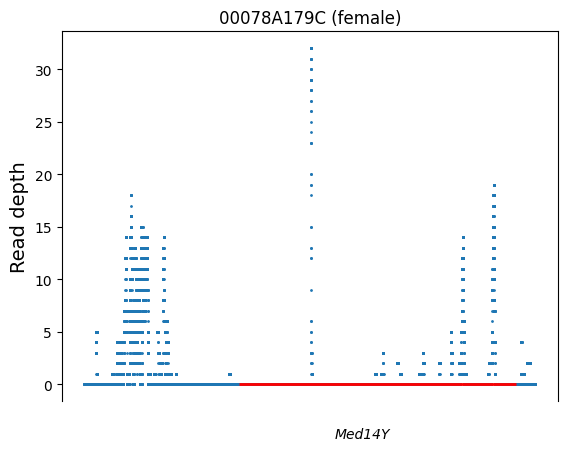

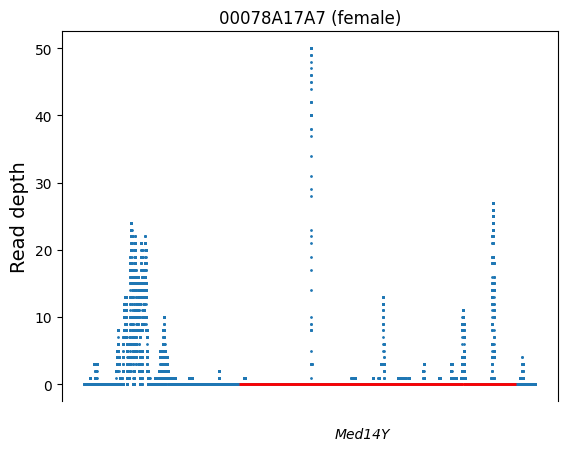

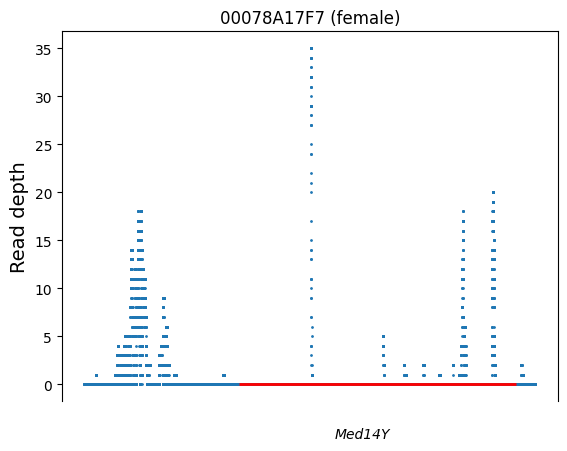

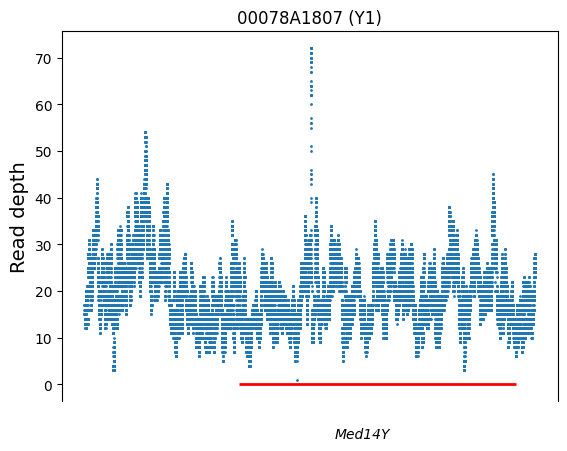

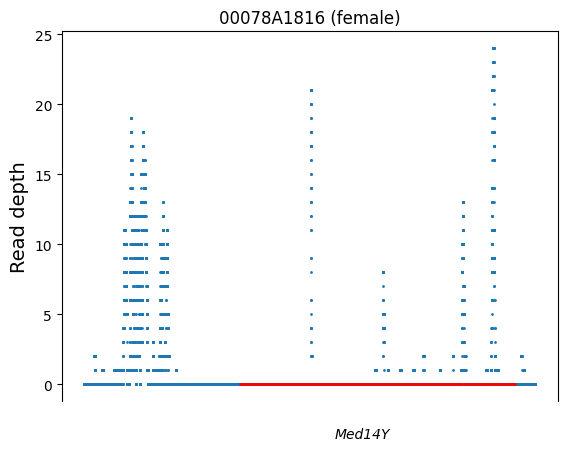

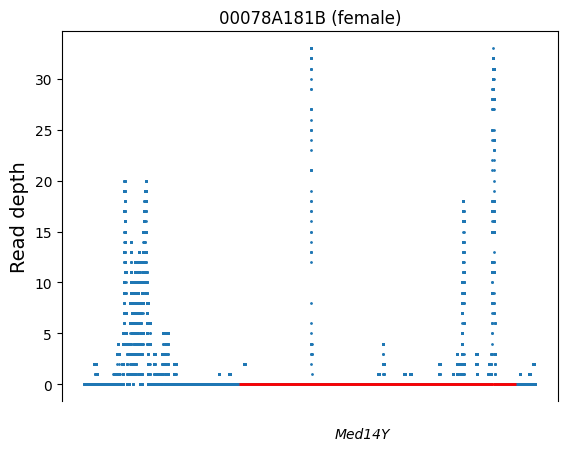

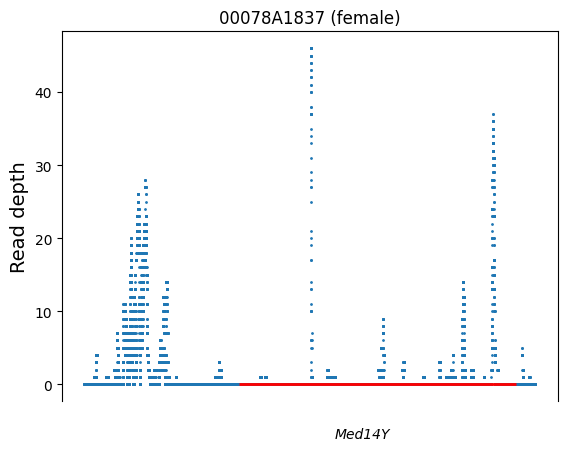

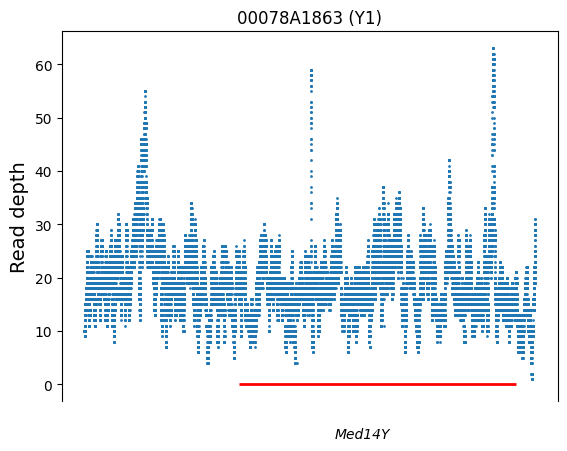

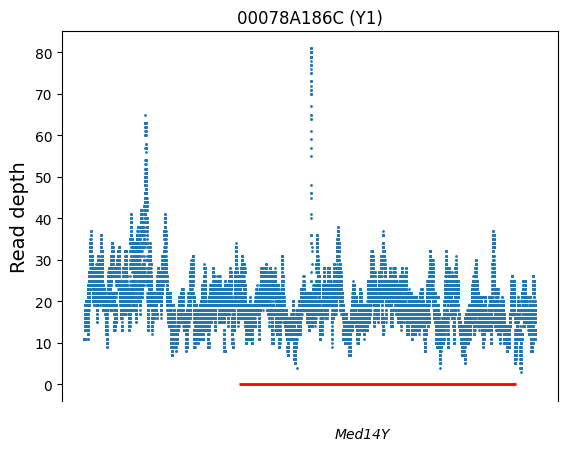

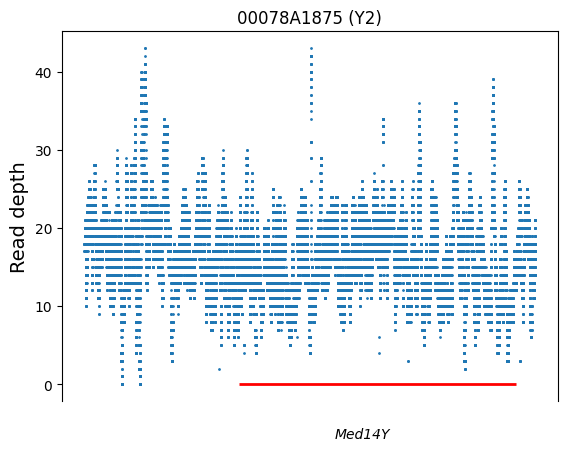

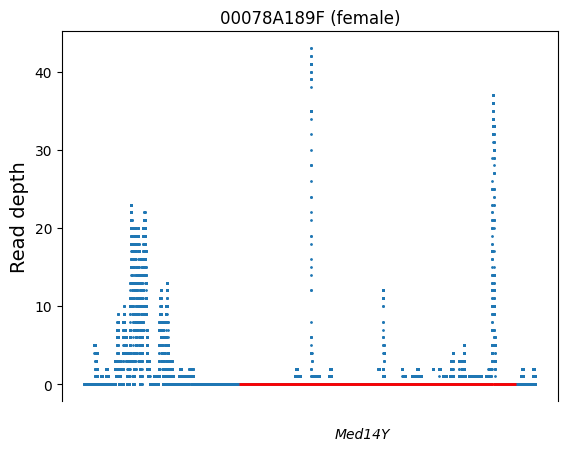

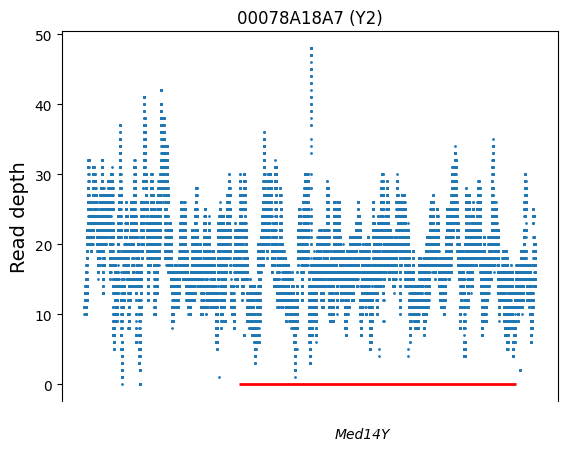

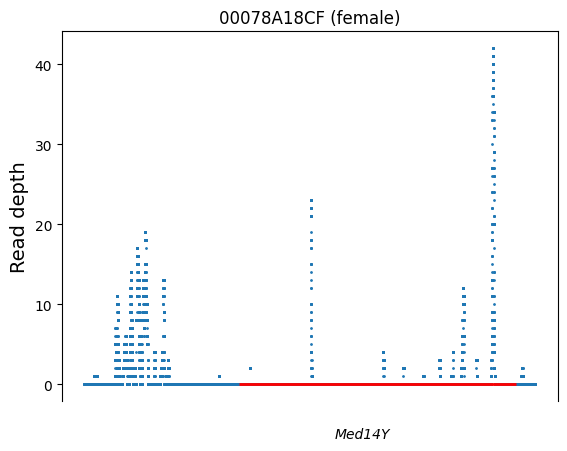

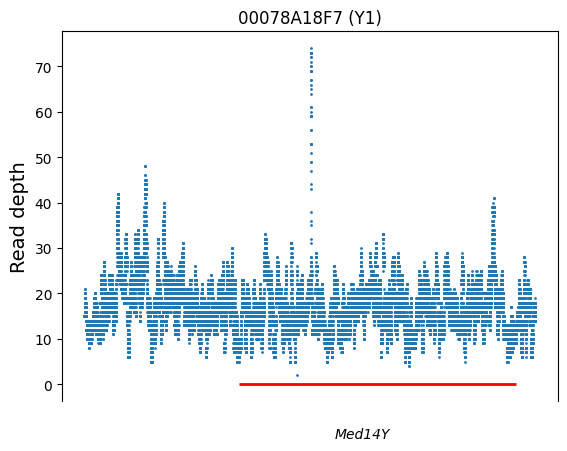

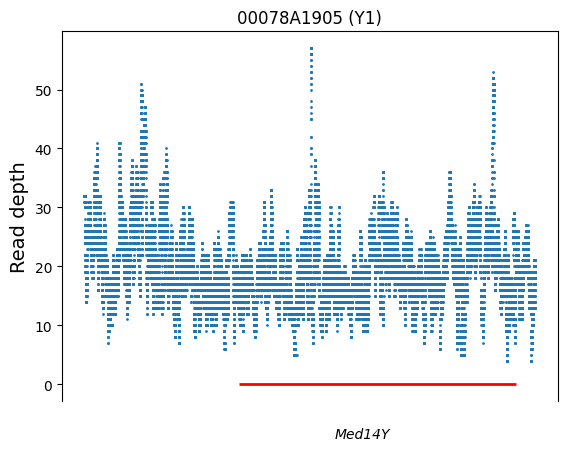

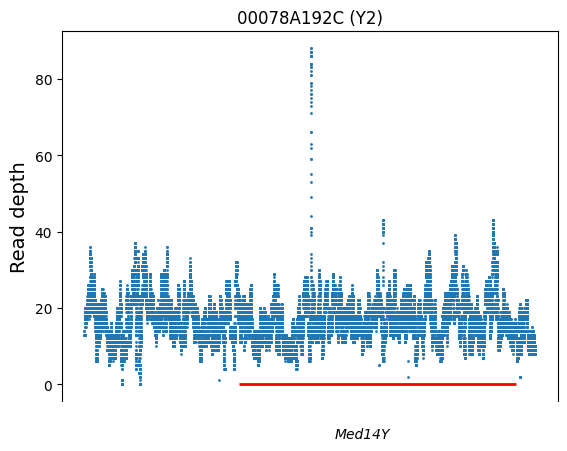

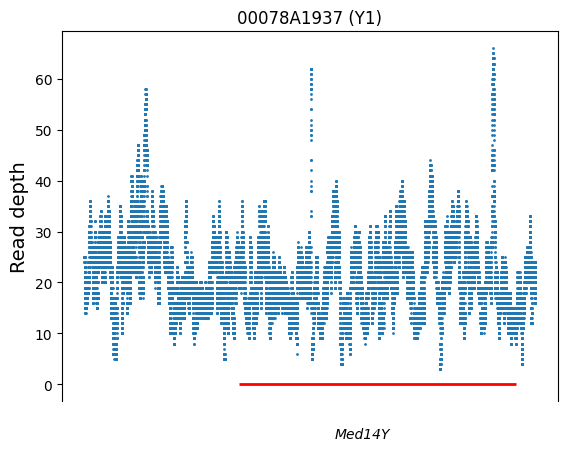

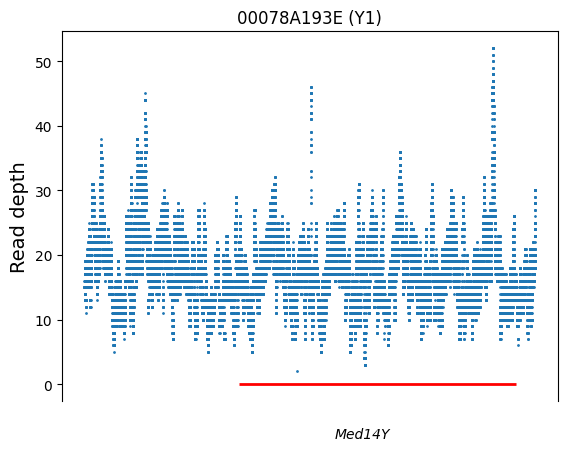

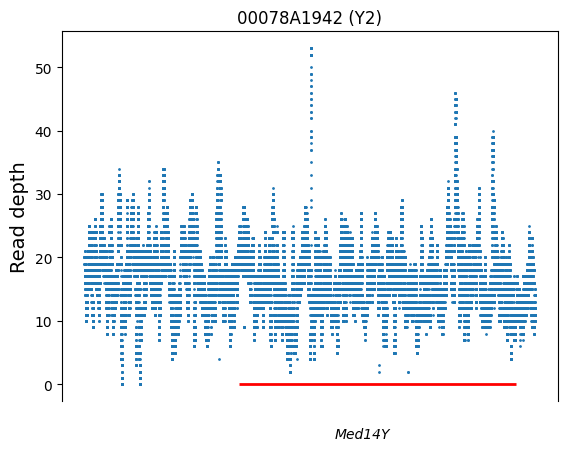

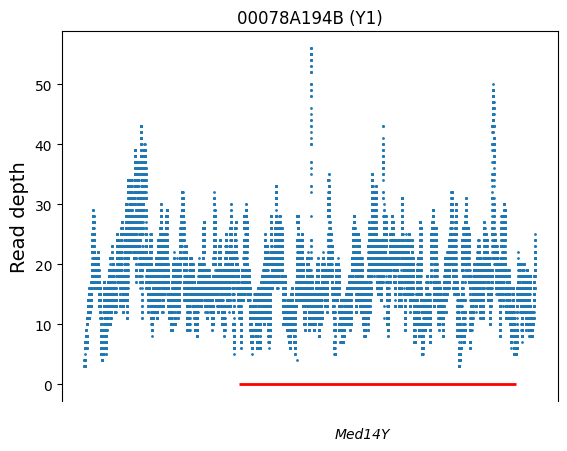

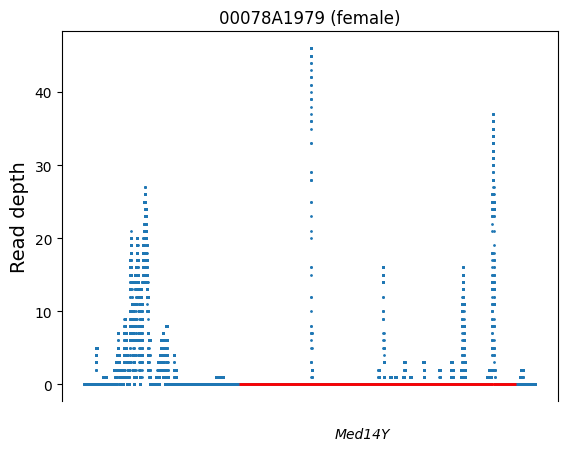

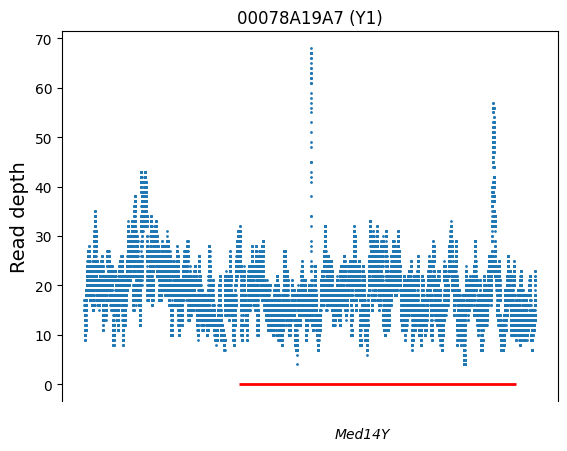

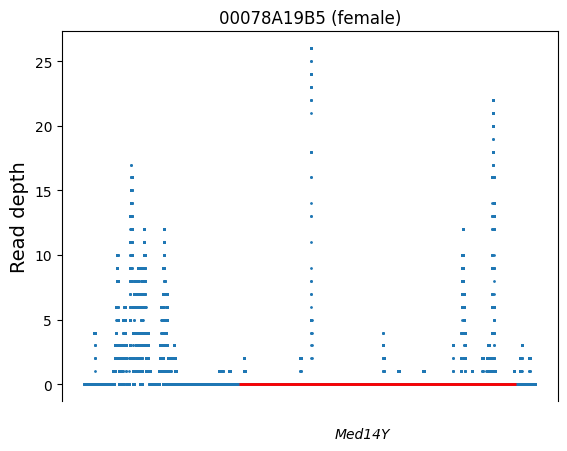

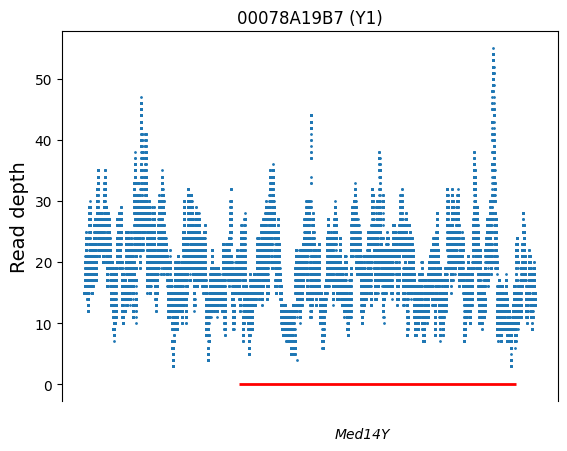

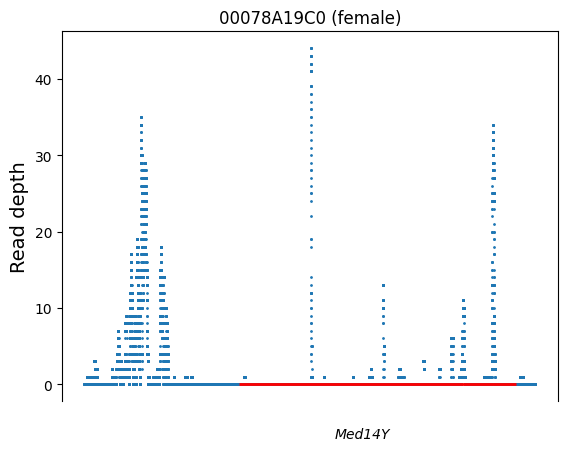

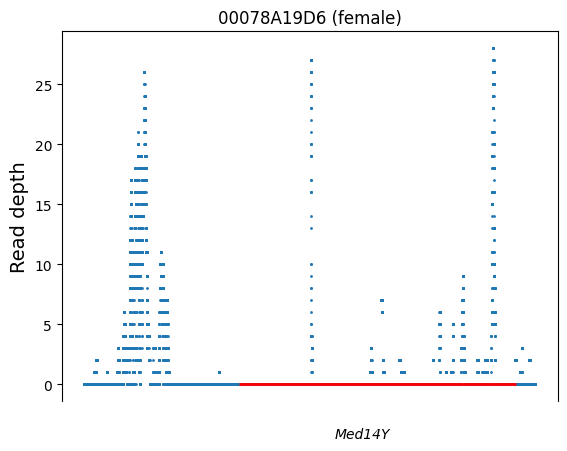

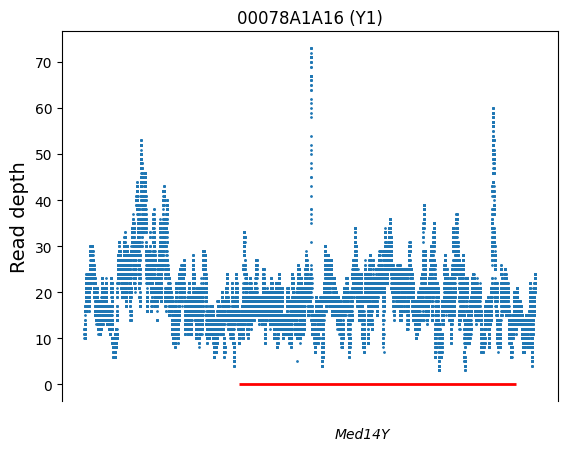

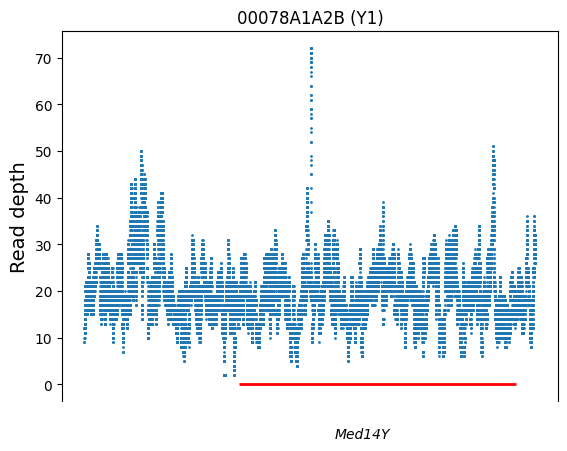

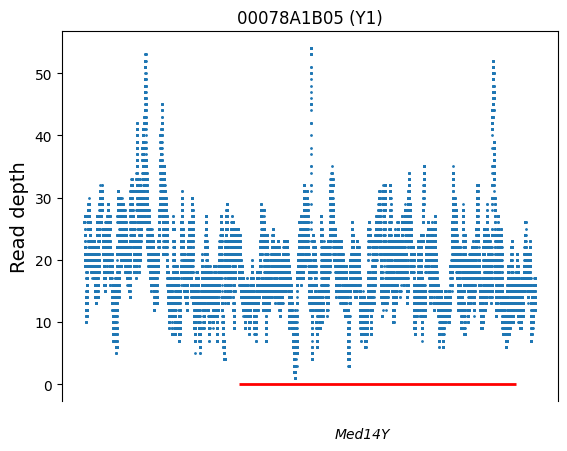

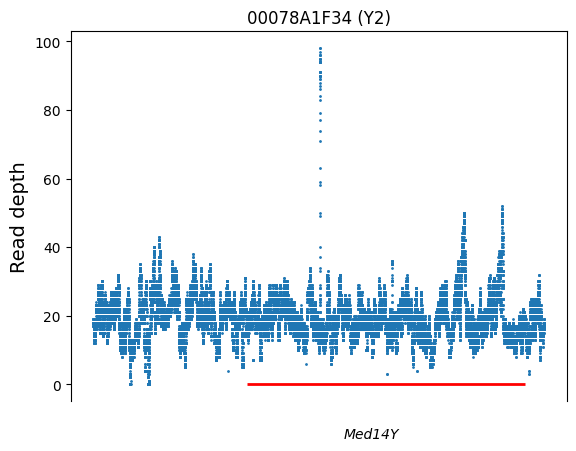

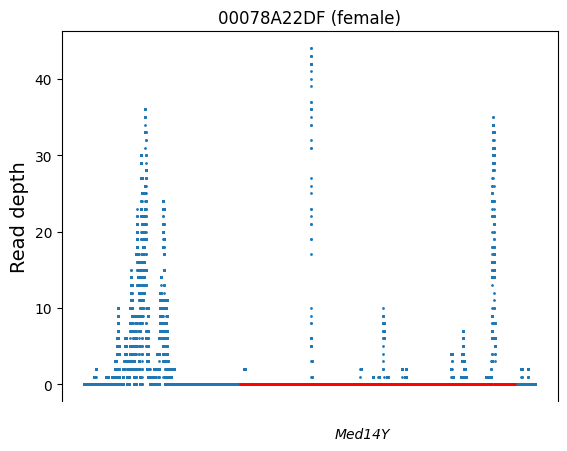

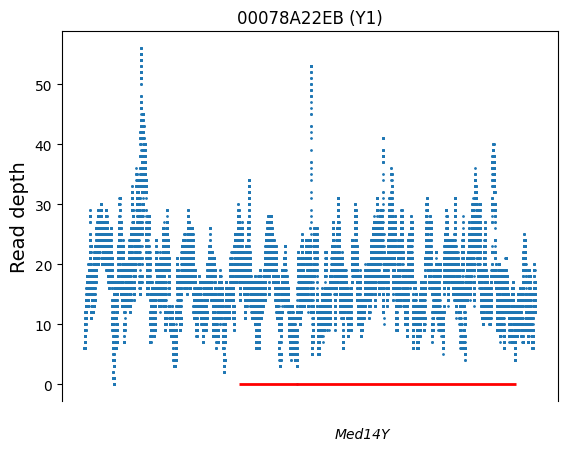

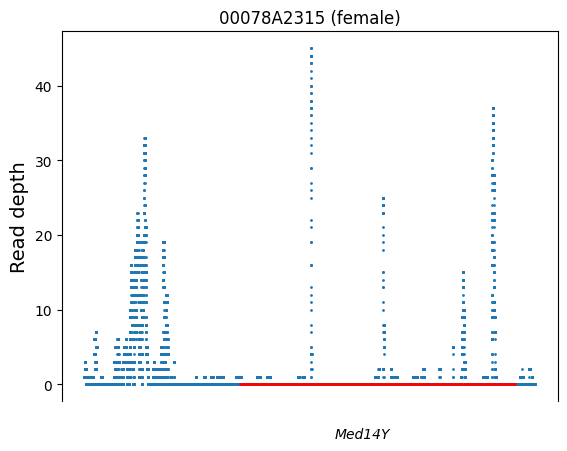

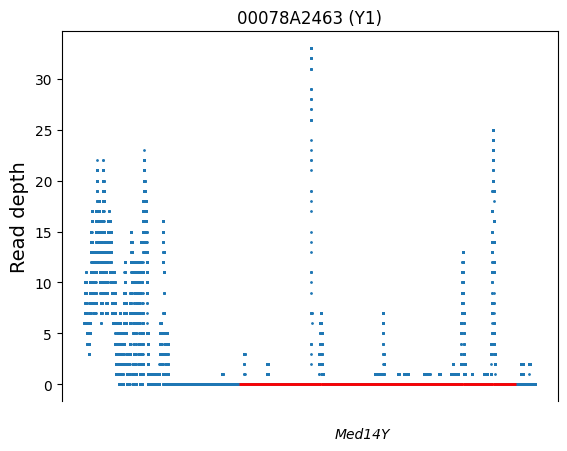

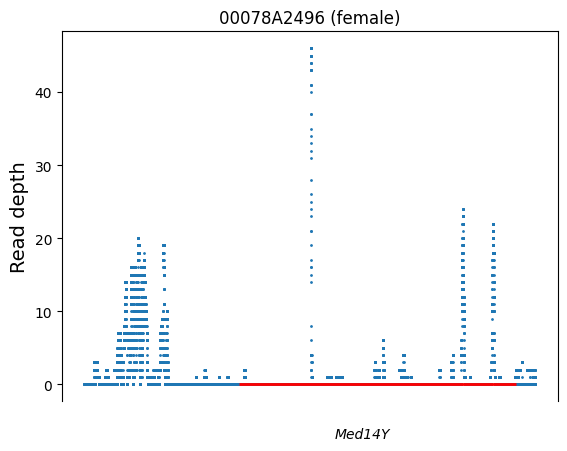

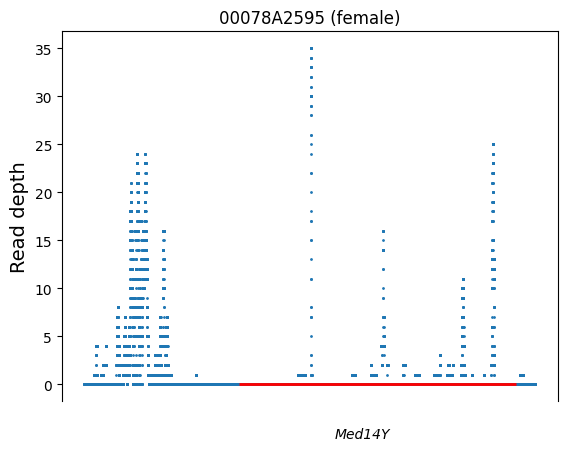

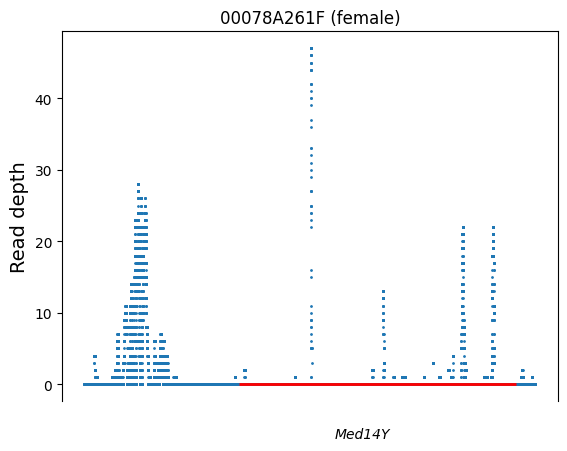

In [5]:
for rfid in deep_modern_depth.columns:
    cur_y_group = sample_info.loc[rfid, "Y_group"]

    plot_coverage(deep_modern_depth[rfid], plt.gca(), show_y_label=True)
    plt.title(f'{rfid} ({cur_y_group})')
    plt.show()

A subset of representative rats are selected for the figure plot.

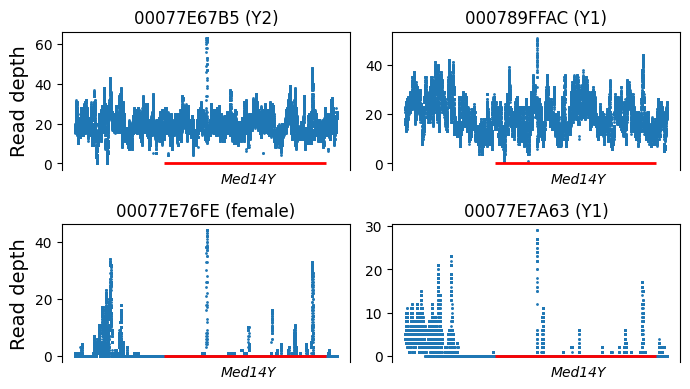

In [6]:
rfids = ['00077E67B5', '000789FFAC', '00077E76FE', '00077E7A63']

fig, axs = plt.subplots(nrows=2, ncols=2)

for row in range(2):
    for col in range(2):
        cur_ax = axs[row, col]
        is_first_col = col==0
        cur_rfid = rfids[row * 2 + col]
        cur_y_group = sample_info.loc[cur_rfid, "Y_group"]

        plot_coverage(deep_modern_depth[cur_rfid], cur_ax,
                      show_y_label=is_first_col)
        cur_ax.set_title(f'{cur_rfid} ({cur_y_group})')

fig.set_size_inches(7, 4)
fig.tight_layout()

# Figure D
io_helpers.save_plot('deep_modern_Med14Y_depth', extension='png', figure=fig)

Read depth within *Med14Y* for low-coverage samples.

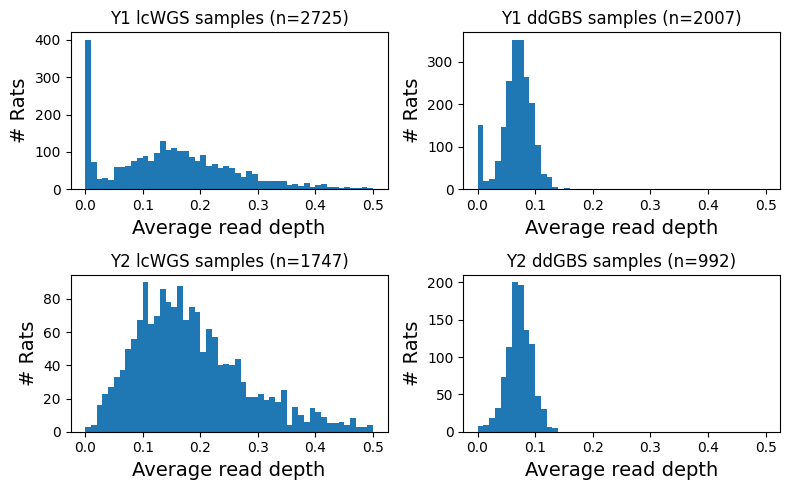

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2)

methods = ['lcWGS', 'ddGBS']

for row in range(2):
    for col in range(len(methods)):
        cur_haplo = f'Y{row + 1}'
        cur_method = methods[col]
        samples = sample_info.loc[(sample_info['Y_group'] == cur_haplo)
                                  & (sample_info['seq_method'] == cur_method)]
        rfids = samples.index
        rfids = rfids[rfids.isin(shallow_modern_depth.columns)]

        axs[row, col].hist(shallow_modern_depth[rfids].mean(), bins=50,
                           range=(0, 0.5))
        axs[row, col].set_title(f'{cur_haplo} {cur_method} samples' 
                                f' (n={len(rfids)})')
        axs[row, col].set_xlabel('Average read depth', fontsize=14)
        axs[row, col].set_ylabel('# Rats', fontsize=14)

fig.set_size_inches(8, 5)
fig.tight_layout()

# Figure E
io_helpers.save_plot('modern_Med14Y_avg_depth', extension='png', figure=fig)